### HW1 Arina Shelashen
1.Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.<br>
2.Проведите анализ — что приводит к ухудшению точности нейронной сети?<br>
3.Что приводит к увеличению ее точности?<br><br>
*Решение:*
1. В работе была исследована зависимость метрики *accuracy* от скорости обучения, кол-ва итераций, кол-ва нейронов. Построены графики зависимости.
2. Слишком большая и слишком малая скорость обучения приводит к ухудшению точности. Оптимум - 0.01 .
3. Увеличение кол-ва итераций и кол-ва нейронов приводит к улучшению метрики. Наилучшие параметры: 3000 итераций, 20 нейронов. Но есть подозрение на переобучение.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [4]:
X, y = load_digits(return_X_y=True)
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [81]:
l_rate = {}
epochs = {}
neuron = {}

In [91]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 30

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.01

# количество итераций
num_epochs = 1000

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

# neuron[neuron_numb] = round(metrics[-1], 3)

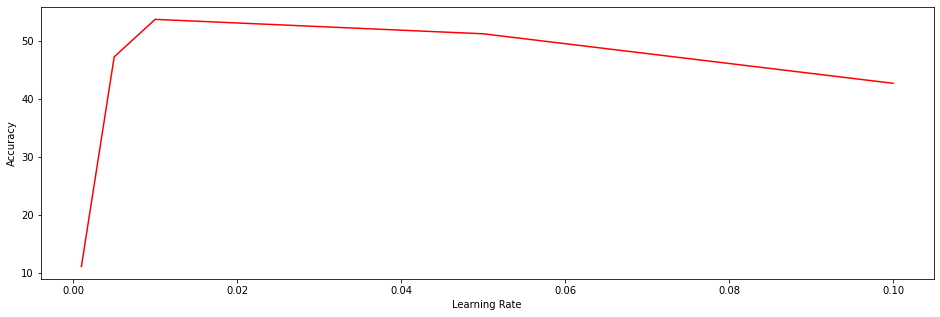

In [55]:

plt.figure(figsize=(16, 5))
plt.plot(list(l_rate.keys()), list(l_rate.values()),'r')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

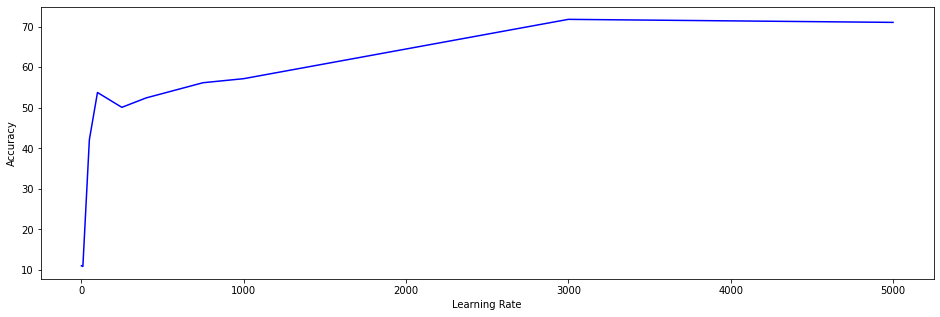

In [69]:

plt.figure(figsize=(16, 5))
plt.plot(list(epochs.keys()), list(epochs.values()),'b')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

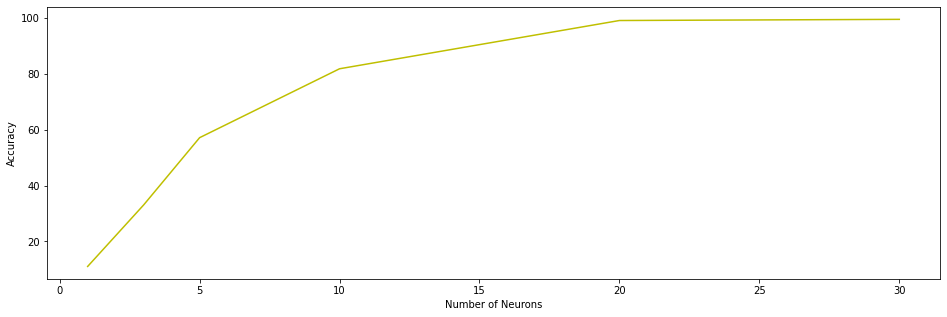

In [92]:
plt.figure(figsize=(16, 5))
plt.plot(list(neuron.keys()), list(neuron.values()),'y')

plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.show()